In [23]:
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Data Set Information:

This data file contains details of various nations and their flags. In this file the fields are separated by spaces (not commas). With this data you can try things like predicting the religion of a country from its size and the colours in its flag.

10 attributes are numeric-valued. The remainder are either Boolean- or nominal-valued.

Attribute Information:

1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

In [2]:
columns = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 
           'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange',
           'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle',
           'icon', 'animate', 'text', 'topleft', 'botright']
columns1 = ['religion', 'bars', 
           'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange',
           'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle',
           'icon', 'animate', 'text', 'topleft', 'botright']

In [18]:
data = pd.read_csv("../data/flags/flag.data", index_col=False, names=columns)
df = data[columns1]
df.head(5)

,religion,bars,stripes,colours,red,green,blue,gold,white,black,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,2,0,3,5,1,1,0,1,1,1,...,0,0,1,0,0,1,0,0,black,green
1,6,0,0,3,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,red,red
2,2,2,0,3,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,green,white
3,1,0,0,5,1,0,1,1,1,0,...,0,0,0,0,1,1,1,0,blue,red
4,0,3,0,3,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,blue,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   religion  194 non-null    int64 
 1   bars      194 non-null    int64 
 2   stripes   194 non-null    int64 
 3   colours   194 non-null    int64 
 4   red       194 non-null    int64 
 5   green     194 non-null    int64 
 6   blue      194 non-null    int64 
 7   gold      194 non-null    int64 
 8   white     194 non-null    int64 
 9   black     194 non-null    int64 
 10  orange    194 non-null    int64 
 11  mainhue   194 non-null    object
 12  circles   194 non-null    int64 
 13  crosses   194 non-null    int64 
 14  saltires  194 non-null    int64 
 15  quarters  194 non-null    int64 
 16  sunstars  194 non-null    int64 
 17  crescent  194 non-null    int64 
 18  triangle  194 non-null    int64 
 19  icon      194 non-null    int64 
 20  animate   194 non-null    int64 
 21  text      194 no

К счастью пустых значений в датасете нет совсем :)

In [5]:
ProfileReport(df)

D:\anaconda3\envs\WorkEnv\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


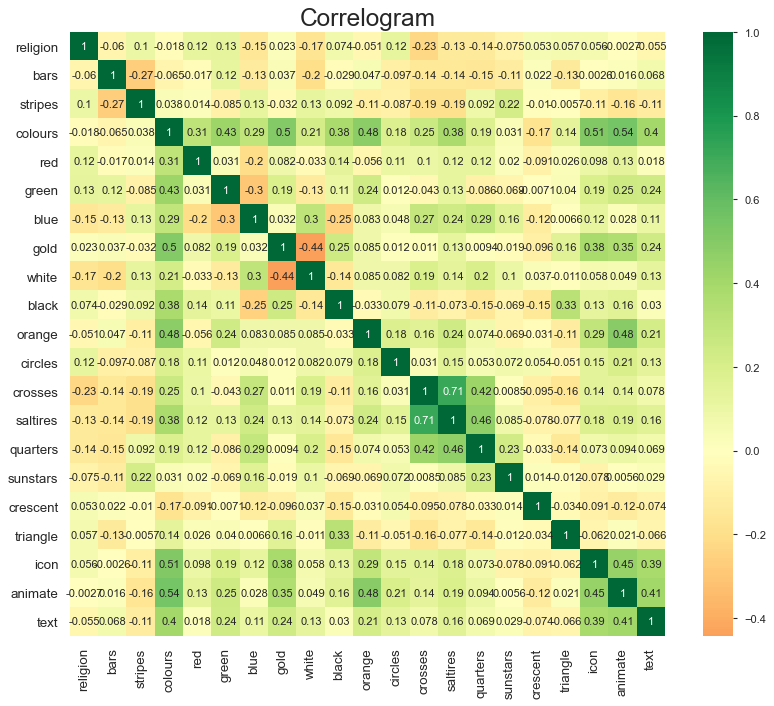

In [7]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 800x640 with 0 Axes>

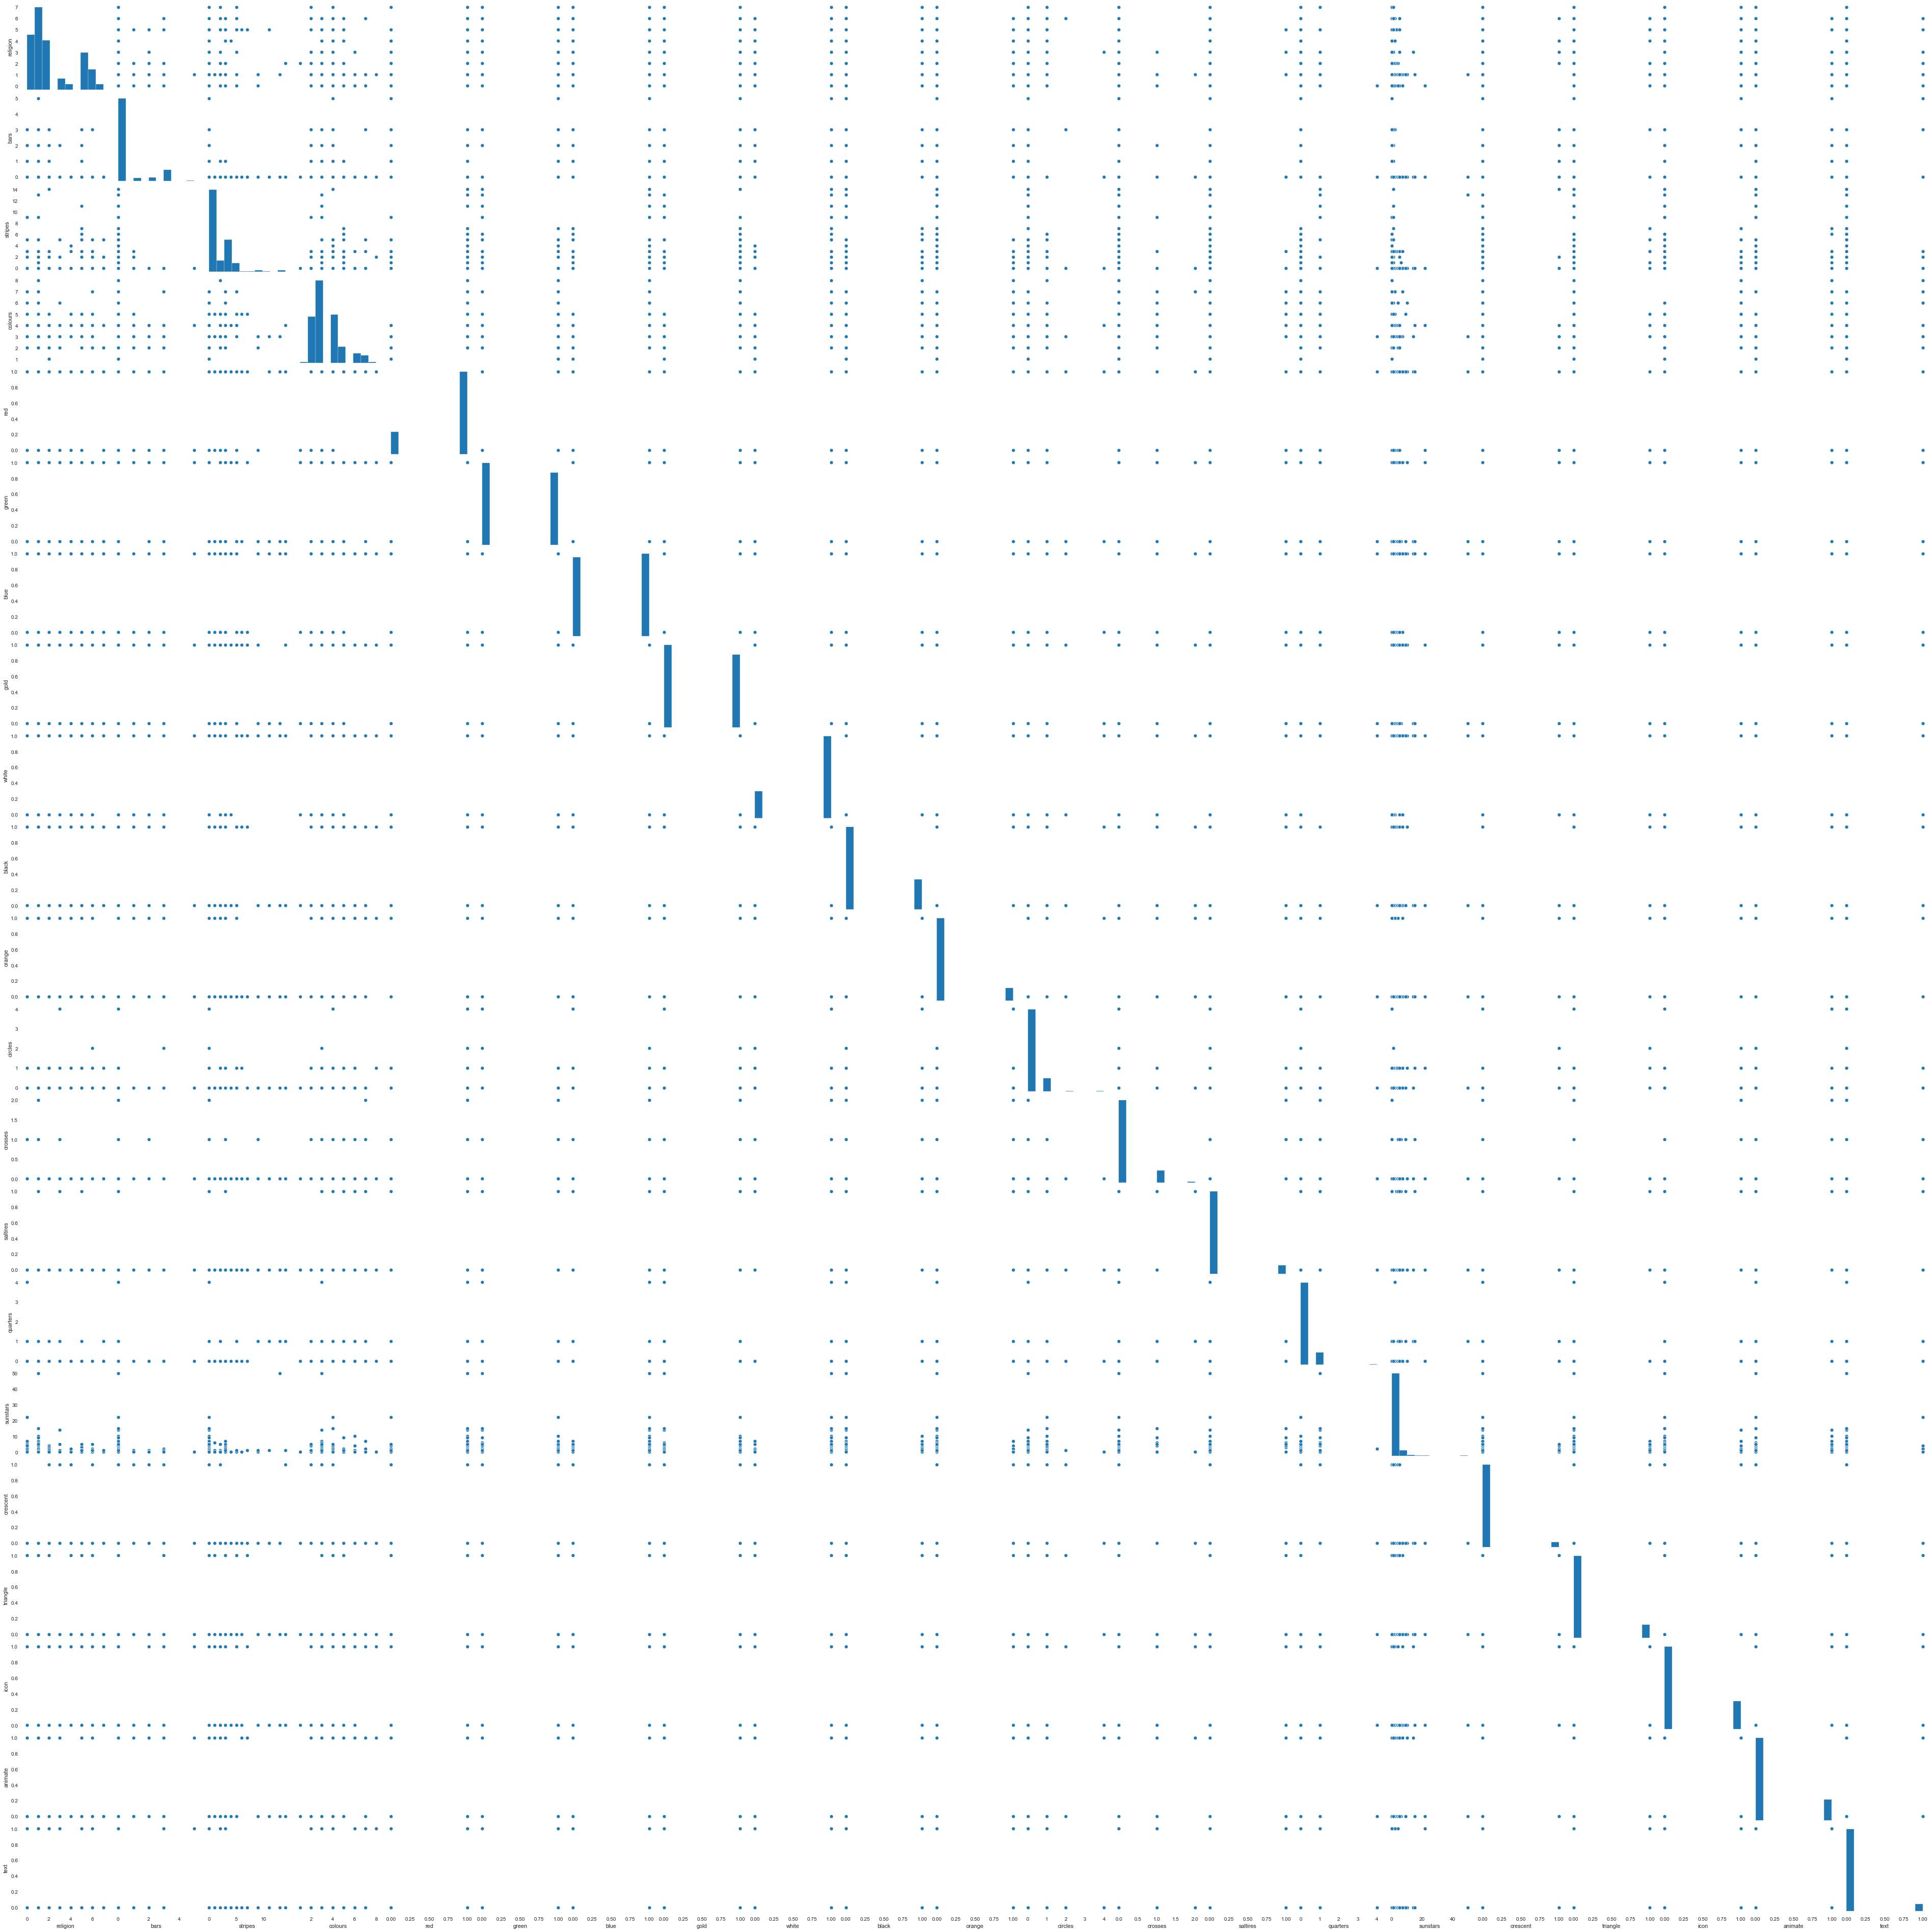

In [9]:

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df)
plt.show()

In [19]:
categories = list(df.dtypes[df.dtypes=='object'].index)
print(categories)

['mainhue', 'topleft', 'botright']


In [20]:
df = pd.get_dummies(df, columns=categories)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['religion']), df.religion, test_size=0.2)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) 
grid_SVC = grid_search.fit(X_train, y_train).best_estimator_

In [25]:
print('accuracy:',accuracy_score(y_test,grid_SVC.predict(X_test)))
print('precision:',precision_score(y_test,grid_SVC.predict(X_test), average='weighted'))
print('recall:',recall_score(y_test,grid_SVC.predict(X_test), average='weighted'))
print('f:',f1_score(y_test,grid_SVC.predict(X_test), average='weighted'))

accuracy: 0.5128205128205128
precision: 0.41855203619909503
recall: 0.5128205128205128
f: 0.4599254231607172


D:\anaconda3\envs\WorkEnv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
